In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [32]:
#set parameters
L = 1.0 #length of the rod
nx = 51 #location points on the rod. 
dx = L / (nx -1) #the distance between two points
alpha = 1.22e-3 #thermal diffusion

#Location the rod
x = numpy.linspace(0.0, L, num=nx)

#set  the inital temp along the rod
T0 = numpy.zeros(nx)
T0[0] = 100.0

In [33]:
def ftcs(T0, nt, dt, dx, aplha): 
    """
    This computes the temp along the rod
    
    """
    
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = (T[1:-1] + sigma * (T[2:] - 2.0 * T[1:-1] + T[:-2]))
        
    return T

In [34]:
#Set the time step size based on the CLT limit
nt = 100
sigma = 0.5
dt = sigma * dx**2 / alpha # the time-step

#find the temp along the rod.

T = ftcs(T0, nt, dt, dx, alpha)

(0.0, 100.0)

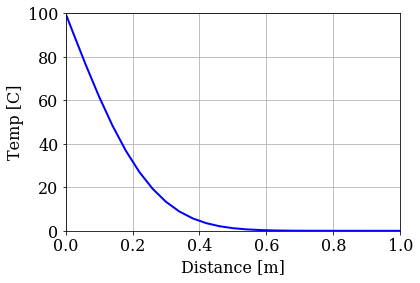

In [35]:
#plot the temp alon the rod
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temp [C]')
pyplot.grid()
pyplot.plot(x, T, color='B', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0)

In [39]:
#increase the time steps
nt = 1000

#temp along the rod
T = ftcs(T0, nt, dt, dx, alpha)

(0.0, 100.0)

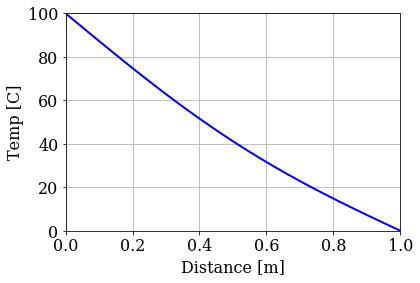

In [40]:
#plot the temp alon the rod
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temp [C]')
pyplot.grid()
pyplot.plot(x, T, color='B', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0)

In [41]:
def ftcs_mixed_bcs(T0, nt, dt, dx, aplha):
    """
    uses a different method
    
    """
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = (T[1:-1] + sigma * (T[2:] -2.0 * T[1:-1] + T[:-2]))
        
        #APPLY NUMANS CONDITION
        T[-1] = T[-2]
        
    return T
    

In [43]:
nt = 1000

T  = ftcs_mixed_bcs(T0, nt, dt, dx, alpha)

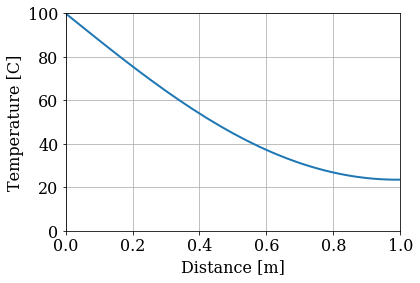

In [46]:
# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);